In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.svm import SVC


In [8]:
# Data generation
np.random.seed(42)

# Generate a random circle center and radius
circle_center = np.random.uniform(2, 5, size=(2,))
circle_radius = np.random.uniform(2, 5, size=(1,))

# Generate random points in a 2D space
num_points = 10000
points = np.random.uniform(-10, 10, size=(num_points, 2))

# Assign labels based on whether the points are inside the randomly generated circle
labels = np.linalg.norm(points - circle_center, axis=1) < circle_radius

# Introduce outliers by flipping labels for some points
outlier_fraction = 0.05
num_outliers = int(outlier_fraction * num_points)
outlier_indices = np.random.choice(num_points, num_outliers, replace=False)
labels[outlier_indices] = ~labels[outlier_indices]


# Print the shape of the generated points and labels
print("Shape of points:", points.shape)
print("Shape of labels:", labels.shape)


Shape of points: (10000, 2)
Shape of labels: (10000,)


In [9]:
# Create a DataFrame using class_dict
class_dict = {'x': points[:, 0], 'y': points[:, 1], 'class': labels}
data = pd.DataFrame(class_dict)

# Print the DataFrame
print(data)


             x         y  class
0     1.973170 -6.879627  False
1    -6.880110 -8.838328  False
2     7.323523  2.022300  False
3     4.161452 -9.588310  False
4     9.398197  6.648853   True
...        ...       ...    ...
9995 -0.146715  8.020770  False
9996  7.540773 -9.063721  False
9997 -3.926031 -1.133600  False
9998 -6.554704  4.599966  False
9999 -6.309760 -3.067206  False

[10000 rows x 3 columns]


In [10]:
# Print the original DataFrame columns 'x' and 'y'
print(data[['x', 'y']])

# Create polynomial features using PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=True)
features = poly.fit_transform(data[['x', 'y']])

# Create a new DataFrame with polynomial features
data_poly_features = pd.DataFrame(features, columns=['1', 'x', 'y', 'x^2', 'xy', 'y^2'])

# Print the DataFrame with polynomial features
print(data_poly_features)


             x         y
0     1.973170 -6.879627
1    -6.880110 -8.838328
2     7.323523  2.022300
3     4.161452 -9.588310
4     9.398197  6.648853
...        ...       ...
9995 -0.146715  8.020770
9996  7.540773 -9.063721
9997 -3.926031 -1.133600
9998 -6.554704  4.599966
9999 -6.309760 -3.067206

[10000 rows x 2 columns]
        1         x         y        x^2         xy        y^2
0     1.0  1.973170 -6.879627   3.893399 -13.574672  47.329270
1     1.0 -6.880110 -8.838328  47.335908  60.808664  78.116038
2     1.0  7.323523  2.022300  53.633988  14.810362   4.089698
3     1.0  4.161452 -9.588310  17.317679 -39.901288  91.935691
4     1.0  9.398197  6.648853  88.326108  62.487229  44.207244
...   ...       ...       ...        ...        ...        ...
9995  1.0 -0.146715  8.020770   0.021525  -1.176771  64.332751
9996  1.0  7.540773 -9.063721  56.863251 -68.347458  82.151036
9997  1.0 -3.926031 -1.133600  15.413716   4.450548   1.285049
9998  1.0 -6.554704  4.599966  42.964141 -30

In [11]:
# Split the data into training and testing sets using train_test_split
x_train, x_test, y_train, y_test = train_test_split(data_poly_features, labels, train_size=0.8)

# Print the shapes of the training and testing sets
print("Shape of x_train:", x_train.shape)
print("Shape of x_test:", x_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)


Shape of x_train: (8000, 6)
Shape of x_test: (2000, 6)
Shape of y_train: (8000,)
Shape of y_test: (2000,)


In [12]:
# Create a Logistic Regression model
model = LogisticRegression()

# Train the model on the training set
model.fit(x_train, y_train)

# Predict labels on the testing set
y_predict = model.predict(x_test)

# Print the shapes of predicted and actual labels
print("Shape of predicted labels:", y_predict.shape)
print("Shape of actual labels (y_test):", y_test.shape)


Shape of predicted labels: (2000,)
Shape of actual labels (y_test): (2000,)


In [13]:
def plot_classes(ax, x, y, labels, circle_center, circle_radius, colors):
    """
    Plot classes with points and a circle on a given axis.

    Parameters:
    - ax (matplotlib.axes.Axes): The axis on which to plot the classes.
    - x (pd.DataFrame): DataFrame with features, including 'x' and 'y'.
    - y (np.array): Array of class labels.
    - labels (list): List of class labels for legend.
    - circle_center (np.array): Coordinates of the circle center.
    - circle_radius (float): Radius of the circle.
    - colors (list): List of colors for each class.

    Returns:
    None
    """
    for i, color in enumerate(colors):
        ax.scatter(x[y == i]['x'], x[y == i]['y'], c=color, label=f'{labels[i]}')
    circle = plt.Circle(circle_center, radius=circle_radius, edgecolor='black', facecolor='none', linewidth=2)
    ax.add_artist(circle)

def plot_class_distribution(x_test, y_test, y_predict, circle_center, circle_radius):
    plt.figure(figsize=(10, 5))

    ax1 = plt.subplot(1, 2, 1)
    plot_classes(ax1, x_test, y_test, ['Class 0', 'Class 1'], circle_center, circle_radius, ['b', 'r'])

    ax2 = plt.subplot(1, 2, 2)
    plot_classes(ax2, x_test, y_predict, ['Class 0', 'Class 1'], circle_center, circle_radius, ['b', 'y'])




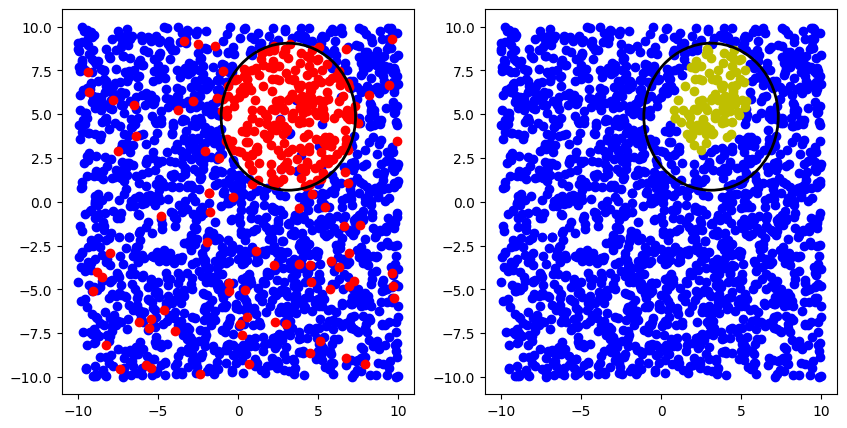

[-0.30933851  0.1349557   0.19502231 -0.03388718  0.01311462 -0.01991997]


In [14]:
# Example usage
plot_class_distribution(x_test, y_test, y_predict, circle_center, circle_radius)
plt.show()

print(model.coef_[0])

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_predict)
print(f'Accuracy: {accuracy:.3f}')

# Precision
precision1 = precision_score(y_test, y_predict,pos_label=1)
precision0 = precision_score(y_test, y_predict,pos_label=0)
print(f'Precision1: {precision1:.3f}')
print(f'Precision0: {precision0:.3f}')

# Recall
recall1 = recall_score(y_test, y_predict,pos_label=1)
recall0 = recall_score(y_test, y_predict,pos_label=0)
print(f'Recall1: {recall1:.3f}')
print(f'Recall0: {recall0:.3f}')

conf_matrix = confusion_matrix(y_test, y_predict)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print(f'TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}')


Accuracy: 0.915
Precision1: 0.923
Precision0: 0.914
Recall1: 0.429
Recall0: 0.994
TN: 171, FP: 1, FN: 16, TP: 12


In [19]:
# Creating an SVM with a quadratic kernel
svm_model = SVC(kernel='poly', degree=2)

print(x_train[['x','y']])
print(x_test[['x','y']])

# Training the model
svm_model.fit(x_train[['x','y']], y_train)

# Predicting on test data
y_pred = svm_model.predict(x_train[['x','y']])

print(y_pred)


             x         y
4757  4.406458  0.588715
362   5.905346 -5.967454
3466 -0.496583 -3.654817
9332  9.954031  9.503848
9054 -8.295718 -9.069630
...        ...       ...
4150 -5.702908 -9.193397
6728 -4.392116  9.510864
8934  9.149831  9.057390
9109  3.426681  6.634422
69   -4.964354 -0.055030

[8000 rows x 2 columns]
             x         y
2321  4.839555  3.554465
1657 -9.893730  6.089893
5712  3.474233 -9.844807
2746 -3.324468  1.586268
610   8.872318 -1.605454
...        ...       ...
1532  9.300307 -4.982139
1760 -7.980438 -6.650178
7704  1.136302  7.659049
6096 -1.006403  6.113696
5152 -5.286258  8.165171

[2000 rows x 2 columns]
[False False False ... False False False]


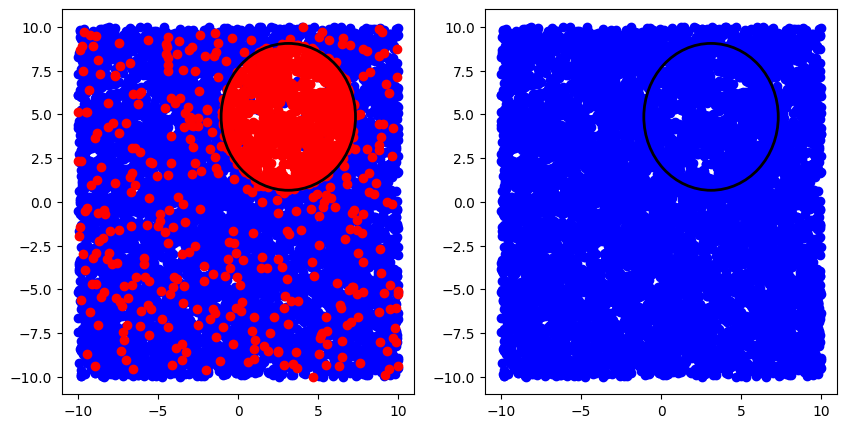

In [20]:
plot_class_distribution(x_train, y_train, y_pred, circle_center, circle_radius)
plt.show()

In [ ]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.3f}')

# Precision
precision1 = precision_score(y_test, y_pred,pos_label=1)
precision0 = precision_score(y_test, y_pred,pos_label=0)
print(f'Precision1: {precision1:.3f}')
print(f'Precision0: {precision0:.3f}')

# Recall
recall1 = recall_score(y_test, y_pred,pos_label=1)
recall0 = recall_score(y_test, y_pred,pos_label=0)
print(f'Recall1: {recall1:.3f}')
print(f'Recall0: {recall0:.3f}')

conf_matrix = confusion_matrix(y_test, y_pred)

TN = conf_matrix[0, 0]
FP = conf_matrix[0, 1]
FN = conf_matrix[1, 0]
TP = conf_matrix[1, 1]

print(f'TN: {TN}, FP: {FP}, FN: {FN}, TP: {TP}')

Accuracy: 0.860
Precision1: 0.000
Precision0: 0.860
Recall1: 0.000
Recall0: 1.000
TN: 172, FP: 0, FN: 28, TP: 0


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
